In [1]:
#Importar en csv Test 2%
import pandas as pd
data_test=pd.read_csv('DataTest2%.csv')

In [2]:
coautores=[]
#########################
coautor=data_test.Coautor
#########################
coautor.reset_index(drop=True, inplace=True)
for r in coautor:
    sep= r.split(',')
    m= len(sep)
    aux=[]
    for i in range(0,m):
        if i==m-1:
            aux.append(int(sep[i][2:-2]))
        else:
            aux.append(int(sep[i][2:-1]))
    coautores.append(aux)

In [3]:
len(coautores)

3151

In [4]:
#Leer los abstracts del data test
#abstract
ab=[]
############################
abstract=data_test.Abstract
############################
abstract.reset_index(drop=True, inplace=True)

for r in abstract:
    sep= r.split(',')
    m= len(sep)
    aux=[]
    for i in range(0,m):
        if i==m-1:
            aux.append(sep[i][2:-2])
        else:
            aux.append(sep[i][2:-1])
    ab.append(aux)
len(ab)

3151

In [6]:
abst=[]
for r in ab:
    #print(r)
    aux=' '.join(r)
    abst.append(aux)
len(abst)

3151

In [7]:
abst[0]

'fluctuations glacier mass volume indicative changes climate system also strongly affect regional climate hydrology explore possible relationships radial growth schrenk spruce picea schrenkiana fisch et mey mass balance tsentralniy tuyuksuyskiy ts tuyuksuyskiy glacier located northern slopes tianshan mountains arid central asia attempt reconstruct historical mass balance variability ts tuyuksuyskiy glacier using tree-ring widths stable carbon isotope chronologies reconstruction able explain 62.1 variance annual glacier mass balance record 1965–2014 calibration period also analyzed centennial mass balance variability linkages climate change ts.tuyuksuyskiy glacier negative annual mass balance years since 1968 undergone rapid longest melting process past 166 years mass balance change glacier controlled combination temperature precipitation conditions study could useful detailed glaciological hydrological climatological assessments portion tianshan mountains 2018 authors'

In [8]:
#Generar vector de palabras:
import gensim
import collections
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.test.utils import get_tmpfile
tagged_documents = []
index = 0
for new in abst:
    tagged_documents.append(TaggedDocument(new, [index]))
    index += 1


In [10]:
tagged_documents[1]

TaggedDocument(words='streptococcus mutans primary etiological agent human dental caries major virulence factors glucosyltransferases gtfs utilize sucrose synthesize extracellular polysaccharides eps leading formation dental plaque biofilm current study designed develop novel self-targeting gene editing technology targeted gtfs inhibit biofilms formation crispr-cas system ie clustered regularly interspaced short palindromic repeat crispr-associated proteins provides sequence-specific protection foreign genetic materials archaea bacteria widely developed genomic engineering first study test whether components crispr-cas9 system mutans ua159 necessary defend foreign dna data showed suitable pam site tracrrna cas9 rnase iii indispensable elements perform normal function mutans crispr-cas9 system based results designed self-targeting crispr arrays containing spacer sequences identifying gtfb cloned onto plasmids afterward transformed plasmids editing templates ua159 self-targeting acquire 

In [11]:
#Cargar el modelo de wikipedia
#print("empieza cargar el modelo")
model_wiki = Doc2Vec.load("enwiki_doc2vec")

In [13]:
index=0
lista_vector=[]
for tag in tagged_documents:
    aux=model_wiki.infer_vector(abst[index])
    lista_vector.append(aux)
    #print (index)
    index+=1
print(index)

3151


In [15]:
len(lista_vector)

3151

In [48]:
import community
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity
#Creación de grafo con peso de titulo
g_abs=nx.Graph()
ind=0
###############################
autor=data_test.IdAutor
###############################
autor.reset_index(drop=True, inplace=True)
pesos=[]
for node in autor:
    g_abs.add_node(node)

for edge in coautores:
    counter=Counter(edge)
    #dist=levenshteinDistance()
    for elem in counter:
        encontrado=0
        if elem == autor[ind]:
            encontrado=0
        else:
            for a in autor:
                if elem== a:
                    encontrado=1
        if encontrado:
            n=0
            for item in autor:
                if (item==elem):
                    indice=n
                    break
                n+=1
            dist=cosine_similarity([lista_vector[ind]],[lista_vector[indice]])
            #dist=levenshteinDistance(abst[ind],abst[indice])
            #Normalizando
            peso=2 - dist[0][0]
            #peso=dist[0][0]
            pesos.append(peso)
            g_abs.add_edge(autor[ind], elem, weight=peso)
    ind+=1
    if (ind%100)==0: print (ind)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100


In [49]:
index=0
lista_minor=[]
for peso in pesos:
    if peso<0:
        lista_minor.append([index,peso])
    index+=1
        
        

In [50]:
len(lista_minor)

0

In [51]:
print (nx.info(g_abs))

Name: 
Type: Graph
Number of nodes: 3151
Number of edges: 172
Average degree:   0.1092


2985.0
0.9916078580748396


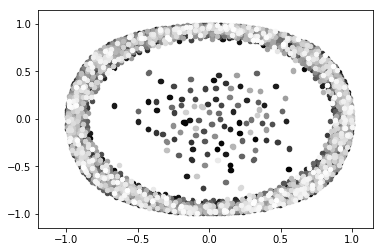

In [52]:
import community
import networkx as nx
import matplotlib.pyplot as plt

G=g_abs
#first compute the best partition
partition = community.best_partition(G,weight='weight')
mod_tittle=community.modularity(partition,G)
#drawing
size = float(len(set(partition.values())))
print(size)
print(mod_tittle)
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [17]:
from collections import Counter
e=[1,2,3,4,5,4]
c=Counter(e)

In [25]:
for i in c:
    print(i+1)

2
3
4
5
6
